<a href="https://colab.research.google.com/github/Muhammad-Asif10710/Gen-AI/blob/main/Test_train_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U seaborn--upgrade

ERROR: Could not find a version that satisfies the requirement seaborn--upgrade (from versions: none)
ERROR: No matching distribution found for seaborn--upgrade


In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_multi_class_sentiment.csv")

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [ ]:
df.isnull().sum()
#where df is null sum those items

,0
text,0
label,0
label_name,0


In [ ]:
df.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [ ]:
df['label'].value_counts()
#checks repeated value counts of classes in datasets like cats dogs etc

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


In [ ]:
import matplotlib.pyplot as plt
#Matplotlib is a powerful data visualization library in Python, mainly used for creating static, animated, and interactive plots. It works well with NumPy, Pandas, and Seaborn.
label_counts= df["label_name"].value_counts(ascending=True)
label_counts
#shows the classes

,count
label_name,
surprise,572
love,1304
fear,1937
anger,2159
sadness,4666
joy,5362


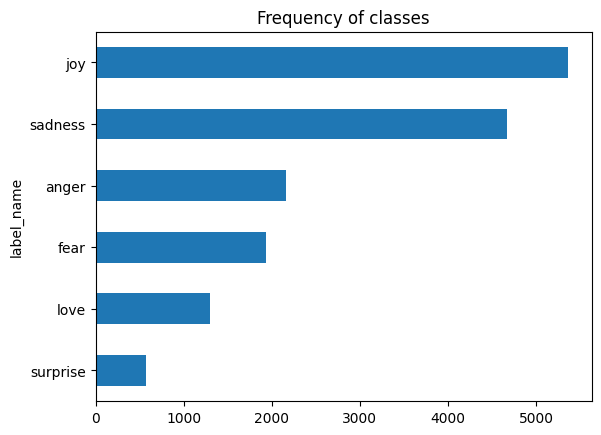

In [ ]:
label_counts.plot.barh()
#shows value in bar
plt.title("Frequency of classes")
plt.show()

In [ ]:
df['words-per-tweet']= df['text'].str.split().apply(len)
#from the data where label on column text it splits the word of the text and then counts the lenght of words
df

,text,label,label_name,words-per-tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


<Axes: title={'center': 'words-per-tweet'}, xlabel='label_name'>

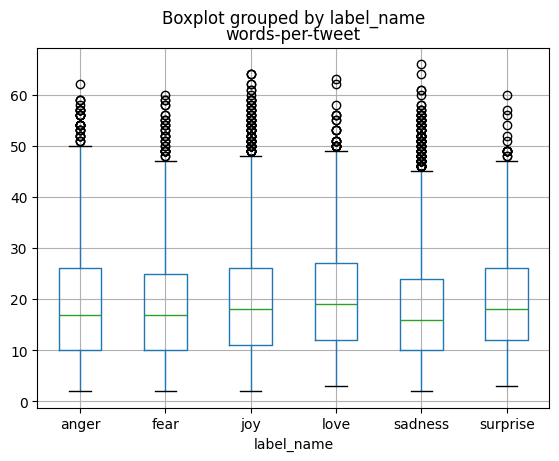

In [ ]:
df.boxplot("words-per-tweet", by="label_name")

In [ ]:
from transformers import AutoTokenizer
model="bert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model)
text="i love asif, tokenize"
tokenized_text=tokenizer(text)
tokenized_text

{'input_ids': [101, 1045, 2293, 2004, 10128, 1010, 19204, 4697, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

Token type ids define as 0 Sentence A: The first sentence (or passage) in the input.
as 1 Sentence B: The second sentence (or related text), which can either be a continuation or a separate context

In [ ]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.3,stratify=df['label_name'])
test, validation =train_test_split(test, test_size=1/3,stratify=test['label_name'])
#validation is done on 10 percent as size 1/3 is of test size

train.shape, test.shape, validation.shape

((11200, 4), (3200, 4), (1600, 4))

The train_test_split function in Scikit-Learn is used to split a dataset into training and testing sets for machine learning. Test size 0.3 explains that 30 percent data will  be tested. Testing is crucial in machine learning to evaluate how well a model generalizes to new, unseen data. Without testing, a model might memorize the training data instead of learning meaningful patterns.
The stratify parameter in train_test_split ensures that the train and test sets maintain the same class distribution as the original dataset. This is especially useful for imbalanced datasets, where one class has significantly more samples than others.


In [ ]:
from datasets import Dataset, DatasetDict
dataset=DatasetDict(
 {
'train':Dataset.from_pandas(train, preserve_index=False),
'test':Dataset.from_pandas(test, preserve_index=False),
'validation':Dataset.from_pandas(validation, preserve_index=False)})

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet'],
        num_rows: 1600
    })
})

In [ ]:
from transformers import AutoTokenizer
model_ckpt="bert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
  temp = tokenizer(batch['text'], padding=True, truncation=True)
  return temp
print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1045, 2514, 22614, 2651, 2061, 1045, 2222, 2681, 2023, 2004, 1037, 5432, 2000, 2870, 2006, 2129, 7490, 1045, 2064, 2022, 102], [101, 1045, 2442, 2360, 2295, 1045, 2031, 2042, 3110, 3492, 6355, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [ ]:
emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None)
emotion_encoded

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words-per-tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [ ]:
label2id = {x['label_name']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items() }
label2id, id2label
#

({'anger': 3, 'joy': 1, 'fear': 4, 'sadness': 0, 'surprise': 5, 'love': 2},
 {3: 'anger', 1: 'joy', 4: 'fear', 0: 'sadness', 5: 'surprise', 2: 'love'})

In [ ]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model)

In [ ]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig
num_labels = len(label2id)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
config=AutoConfig.from_pretrained(model, num_labels=num_labels, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model, config=config).to(device)

OSError: Incorrect path_or_model_id: 'BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation()
        )
        (output): BertOutput(
          (dense): Linear(in_features=3072, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (pooler): BertPooler(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
  )
)'. Please provide either the path to a local folder or the repo_id of a model on the Hub.